#  k-Nearest Neighbors with `scikit-learn`

## Below I will:

1. Introduce the kNN classification model
2. Utilize the kNN model on the iris data set
3. Implement scikit-learn's kNN model
4. Assess the fit of a kNN Model using scikit-learn

Here we'll get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**, which means that the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will automatedly make a model using kNN.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

The Iris dataset is a famous machine learning dataset, created in the 1930s by R. Fisher.  It's very complete (and not very big), but is often used for learning about classification models.

The dataset comes from UCI (University of California Irvine), which is itself a great source of datasets:

https://archive.ics.uci.edu/ml/datasets/iris
<br />
https://archive.ics.uci.edu/ml/index.php

#### [Home](#home)

<a id="overview-of-the-iris-dataset"></a>
# <font style = 'color:blue'>a) Loading the Iris Data Set</font>
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
# Read the iris data into a DataFrame.
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = 'data/iris.data'
iris = pd.read_csv(data)

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical (i.e. a discrete value).

#### [Home](#home)

<a id="exercise-human-learning-with-iris-data"></a>
# <font style = 'color:blue'>b) Guided Practice: "Human Learning" With Iris Data</font>

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [7]:
# 150 observations, 5 columns (the 4 features & response)
iris.shape

(150, 5)

In [8]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Test for imbalanced classes
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [15]:
# Sort the DataFrame by petal_width and display the NumPy array.
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [17]:
# Mean of sepal_length, grouped by species.
iris.groupby(by='species', axis=0).sepal_length.mean()

C:\Users\natal\AppData\Local\Temp\ipykernel_6792\3393809641.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  iris.groupby(by='species', axis=0).sepal_length.mean()


species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [18]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

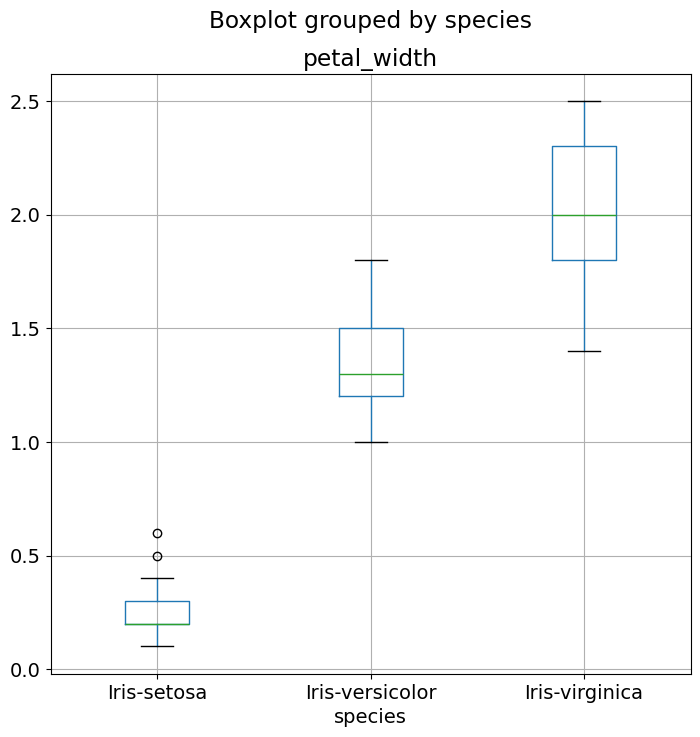

In [20]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species', figsize=(8,8));

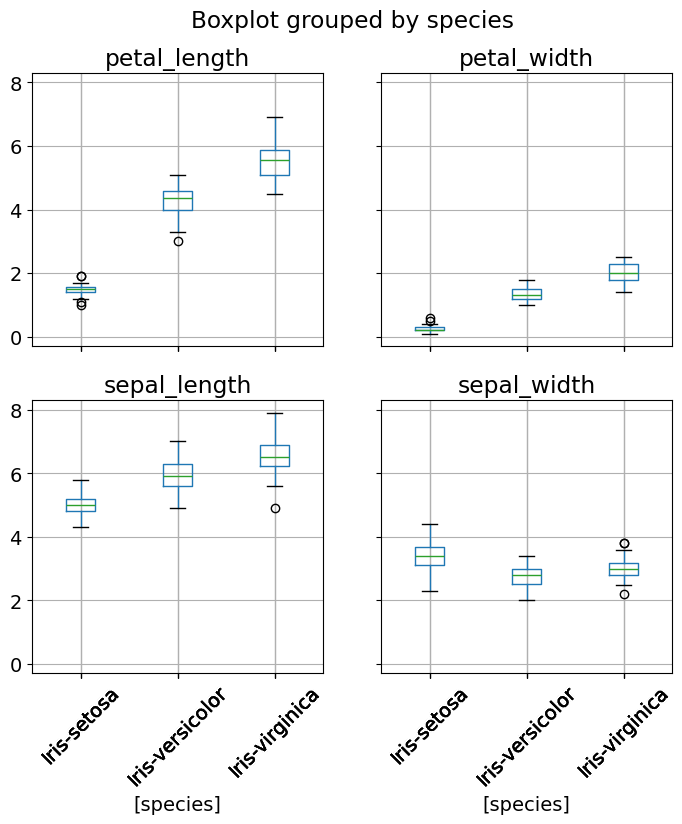

In [21]:
# Box plot of all numeric columns, grouped by species.
iris.boxplot(by='species', rot=45, figsize=(8,8));

In [22]:
# Are these not SO beautiful? I love running these lines of code to get these visuals.

# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0


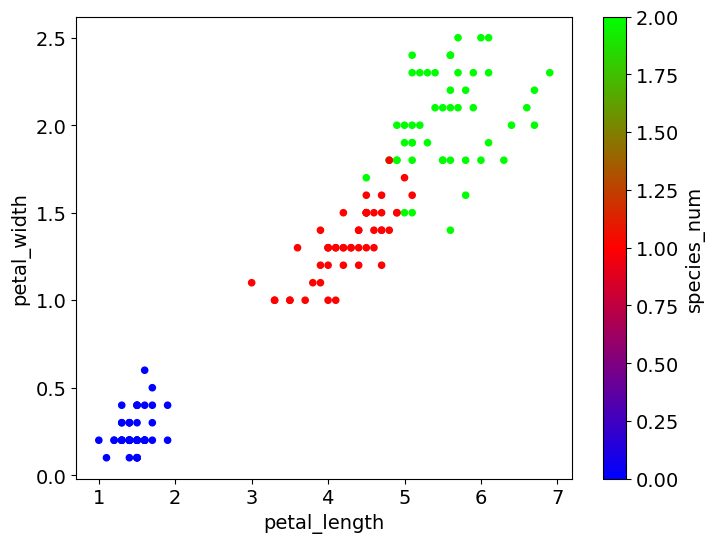

In [24]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

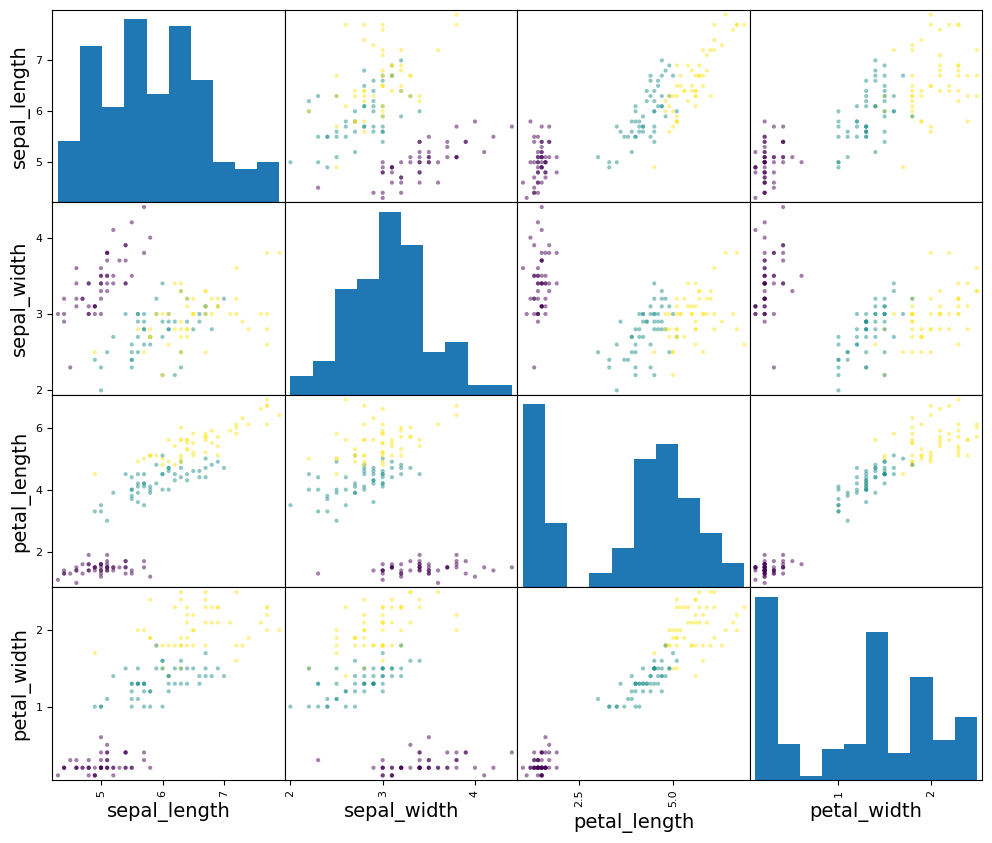

In [25]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

#### <font style='color:green'>Exercise: Using the graphs and data above, can you write down a set of rules that can accurately predict species based on iris measurements?</font>

In [27]:
# Let's try some 'feature engineering': creating new features for our model
# Define a new feature that represents the area of a petal
# As iris petals are more ovular shaped as opposed to rectangular,
# we're going to use the formula for the area of an ellipse:
# r1 * r2 * Pi (3.14)

iris['petal_area'] = ((iris.petal_length/2) * (iris.petal_width/2) * 3.14)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
32,5.2,4.1,1.5,0.1,Iris-setosa,0,0.11775
13,4.3,3.0,1.1,0.1,Iris-setosa,0,0.08635
37,4.9,3.1,1.5,0.1,Iris-setosa,0,0.11775
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0.11775
12,4.8,3.0,1.4,0.1,Iris-setosa,0,0.10990


In [28]:
# Description of petal_area, grouped by species.
iris.groupby('species').petal_area.describe().unstack()

       species        
count  Iris-setosa        50.000000
       Iris-versicolor    50.000000
       Iris-virginica     50.000000
mean   Iris-setosa         0.284798
       Iris-versicolor     4.490514
       Iris-virginica      8.867517
std    Iris-setosa         0.143850
       Iris-versicolor     1.074196
       Iris-virginica      1.693569
min    Iris-setosa         0.086350
       Iris-versicolor     2.590500
       Iris-virginica      5.887500
25%    Iris-setosa         0.208025
       Iris-versicolor     3.815100
       Iris-virginica      7.628238
50%    Iris-setosa         0.235500
       Iris-versicolor     4.407775
       Iris-virginica      8.984325
75%    Iris-setosa         0.329700
       Iris-versicolor     5.298750
       Iris-virginica     10.040150
max    Iris-setosa         0.753600
       Iris-versicolor     6.782400
       Iris-virginica     12.457950
dtype: float64

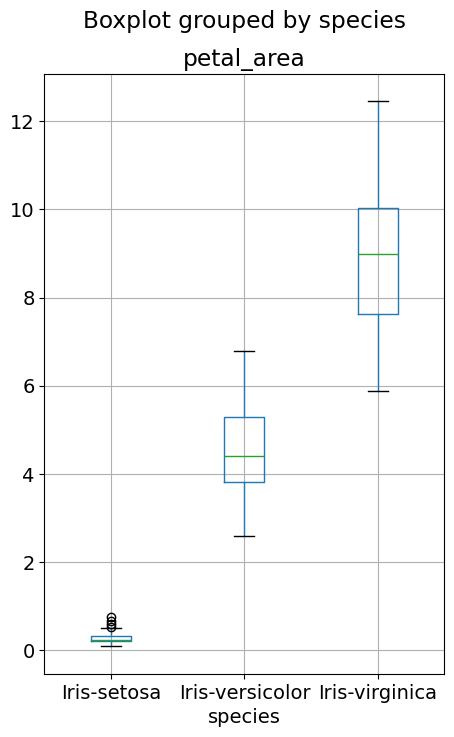

In [29]:
# Box plot of petal_area, grouped by species

iris.boxplot(column='petal_area', by='species',figsize=(5,8));

In [30]:
# Only show irises with a petal_area between 3 and 7

iris[(iris.petal_area > 3) & (iris.petal_area < 7)].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
62,6.0,2.2,4.0,1.0,Iris-versicolor,1,3.14000
67,5.8,2.7,4.1,1.0,Iris-versicolor,1,3.21850
80,5.5,2.4,3.8,1.1,Iris-versicolor,1,3.28130
69,5.6,2.5,3.9,1.1,Iris-versicolor,1,3.36765
82,5.8,2.7,3.9,1.2,Iris-versicolor,1,3.67380
64,5.6,2.9,3.6,1.3,Iris-versicolor,1,3.67380
92,5.8,2.6,4.0,1.2,Iris-versicolor,1,3.76800
95,5.7,3.0,4.2,1.2,Iris-versicolor,1,3.95640
53,5.5,2.3,4.0,1.3,Iris-versicolor,1,4.08200
89,5.5,2.5,4.0,1.3,Iris-versicolor,1,4.08200


### One set of rules for predicting an iris' species:

- If petal_area is less than 2, predict **setosa**
- Else if petal_area is less than 7.4, predict **versicolor**
- Otherwise, predict **virginica**

#### Bonus: If you have time during the class break or after class, try to implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [33]:
for _,row in iris.head(2).iterrows():
    print(row.petal_area)

0.11775000000000002
0.08635000000000001


In [34]:
def predict_flower(df):
    '''Creates a prediction for species of iris given pre-defined rules.
    Adds a column called 'prediction' to the DataFrame that is input, populated with the predictions.'''
    preds = []
    for ind, row in df.iterrows():        
        if row.petal_area < 2:
            prediction = 'Iris-setosa'
        elif row.petal_area < 7.4:
            prediction = 'Iris-versicolor'
        else:
            prediction = 'Iris-virginica'
        preds.append(prediction)
    
    df['prediction'] = preds 
    
    return df
    
    
predict_flower(iris)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area,prediction
32,5.2,4.1,1.5,0.1,Iris-setosa,0,0.11775,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa,0,0.08635,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa,0,0.11775,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0.11775,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa,0,0.10990,Iris-setosa
...,...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica,2,10.55040,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica,2,9.60840,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,2,11.77500,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica,2,11.18625,Iris-virginica


In [35]:
sum(iris.species==iris.prediction)

140

In [36]:
# Let's see what percentage our manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150

0.9333333333333333

#### [Home](#home)

<a id="human-learning-on-the-iris-dataset"></a>
# <font style = 'color:blue'>c) Human Learning on the Iris Data Set</font>
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [38]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [39]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

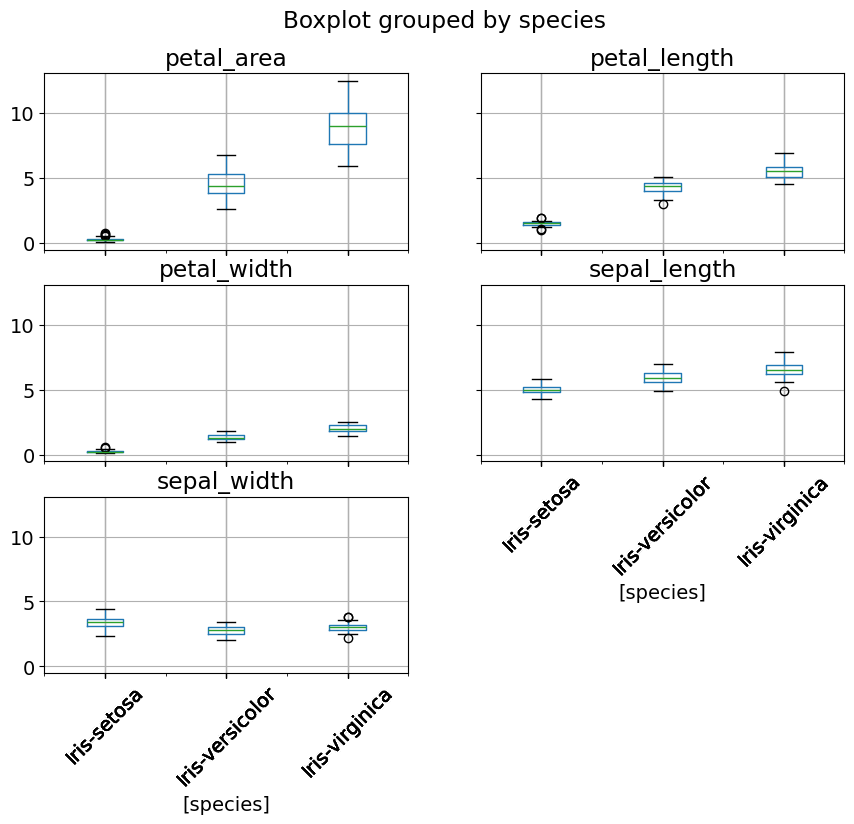

In [40]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

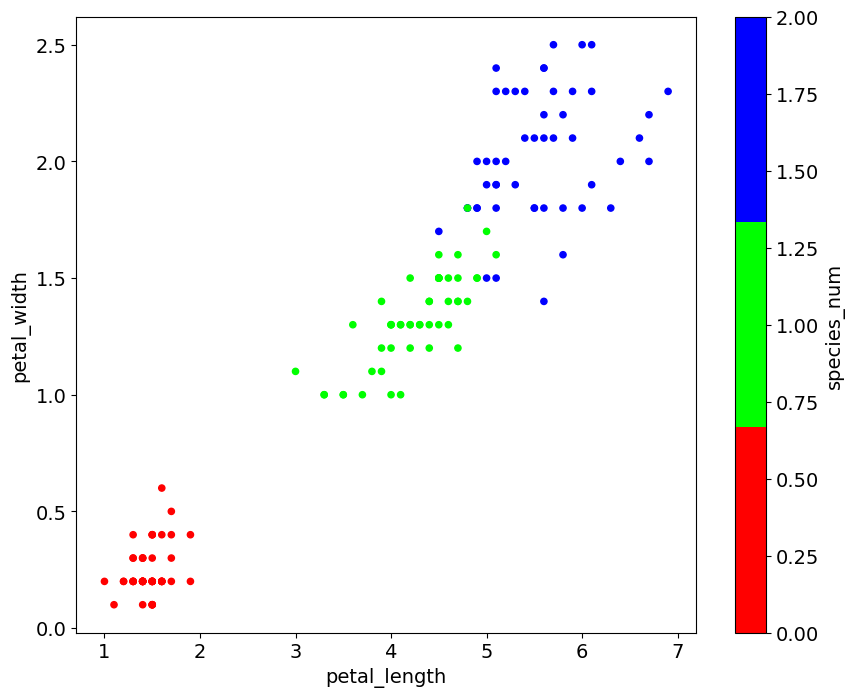

In [41]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

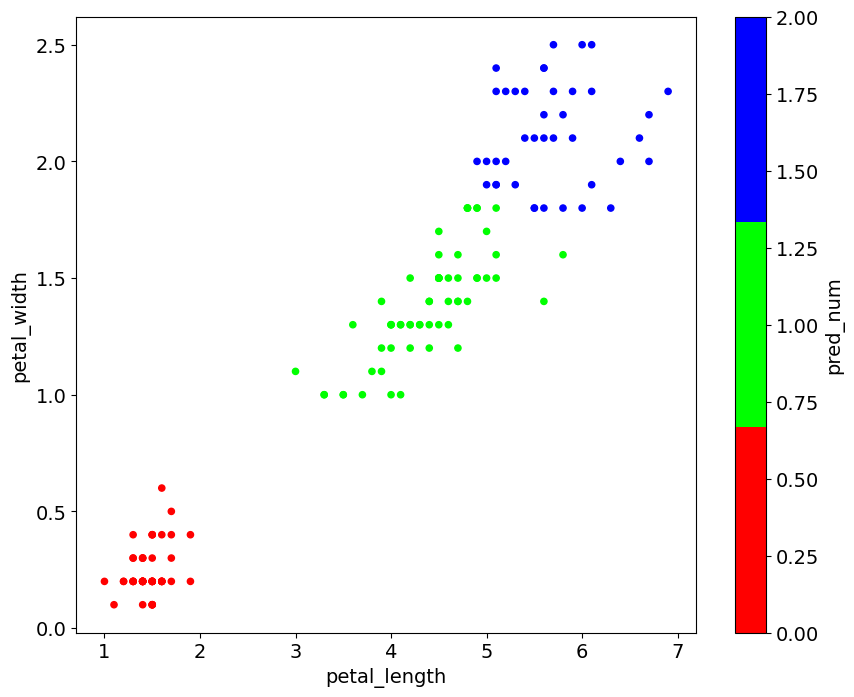

In [42]:
# This conversion relies on a 'prediction' column, which is created in the Bonus section of the Exercise in b) above.
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap=cmap_bold);

---

#### [Home](#home)

<a id="knn-classification-nba"></a>
# <font style = 'color:blue'>d) Guided Intro to KNN: NBA Position KNN Classifier</font>

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features and the target we are tryng to predict - a player's position ('pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [45]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [46]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 2015 to 2015
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        478 non-null    object 
 1   pos           478 non-null    object 
 2   age           478 non-null    int64  
 3   bref_team_id  478 non-null    object 
 4   g             478 non-null    int64  
 5   gs            478 non-null    int64  
 6   mp            478 non-null    float64
 7   fg            478 non-null    float64
 8   fga           478 non-null    float64
 9   fg_           478 non-null    float64
 10  x3p           478 non-null    float64
 11  x3pa          478 non-null    float64
 12  x3p_          478 non-null    float64
 13  x2p           478 non-null    float64
 14  x2pa          478 non-null    float64
 15  x2p_          478 non-null    float64
 16  ft            478 non-null    float64
 17  fta           478 non-null    float64
 18  ft_           478 non-null    f

In [47]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [48]:
nba.pos.head()

season_end
2015    F
2015    G
2015    C
2015    F
2015    G
Name: pos, dtype: object

In [49]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [50]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [51]:
# Create response vector (y).
y = nba.pos_num

<a id="using-the-traintest-split-procedure-k"></a>
### i) Using the Train/Test Split Procedure (k=1)

#### Step 1: Import the model class we will use

#### Step 2: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Step 3: Train the model on the training set (using k=1).

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Step 4: Test the model on the testing set and check the accuracy.

In [59]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6166666666666667


<font style='color:green'>**Question:** If we had trained on the entire dataset and tested on the entire dataset, using 1-KNN what accuracy would we get?  Why?</font>

<font style='color:green'>**Answer:** We would get an accuracy of 100%, since the model will have been trained on the same data that it is testing and it will only look at the nearest point to determine its prediction; in this case the nearest point is exactly the same as the point being assessed.  (Remember the Voronoi diagram for k=1.)

However, training and testing on the entire dataset is not a good idea.  Our goal is to predict the likely category for out-of-sample data, so we need to test our model on data it has not seen before.  By testing on the same data as we trained the model on, and assuming we have a great model because the accuracy is 100%, we aer potentially rewarding an overly-complex model that won't necessarily generalize well on unseen data.  This is called 'overfitting' the data, and this diagram shows you what it looks like:</font>

<img src="assets/knn_overfitting.png" style="width: 400px;">

_Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons._

#### Repeating for k=50.

In [63]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


<font style='color:green'>**Question:** Suppose we again train and test on the *entire* data set (not splitting it as above), but using 50-KNN. Would we expect the accuracy to be the same as compared to 1-KNN?  Why?</font>

<font style='color:green'>**Answer:** We would expect it to be lower, because in this case the (testing) data is being assessed on the nearest 50 points, which could change the overall label of the point being evaluated.</font>

<a id="null-accuracy"></a>
### ii) Comparing Testing Accuracy With Null Accuracy (the baseline)

In classification tasks, Null Accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players are Centers, we would always predict Center.

The null accuracy is a benchmark against which you may want to measure every classification model.  It is our baseline.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [69]:
y_train.value_counts().index[0]

1

In [70]:
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

pos_num
1    150
2    140
0     68
Name: count, dtype: int64


1

#### Compute the null accuracy / baseline.

In [72]:
y_test.value_counts(normalize=True)

pos_num
2    0.500000
1    0.408333
0    0.091667
Name: proportion, dtype: float64

In [73]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.4083333333333333

#### [Home](#home)

<a id="tuning-a-knn-model"></a>
# <font style = 'color:blue'>e) Tuning a KNN Model</font>
---

In [75]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)

print((metrics.accuracy_score(y, y_pred_class)))

0.7510460251046025


In [76]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

In the next class, we'll discuss **model evaluation procedures**, which allow us to use our existing labeled data to estimate how well our models are likely to perform on out-of-sample data (spoiler alert: we'll be revisiting Type I and Type II errors). These procedures will help us to tune our models and choose between different types of models.


<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [79]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

In [80]:
scores

[[1, 0.9037656903765691],
 [2, 0.7322175732217573],
 [3, 0.7719665271966527],
 [4, 0.7343096234309623],
 [5, 0.7238493723849372],
 [6, 0.7238493723849372],
 [7, 0.7384937238493724],
 [8, 0.7133891213389121],
 [9, 0.7154811715481172],
 [10, 0.7050209205020921],
 [11, 0.6924686192468619],
 [12, 0.7112970711297071],
 [13, 0.696652719665272],
 [14, 0.700836820083682],
 [15, 0.6903765690376569],
 [16, 0.700836820083682],
 [17, 0.696652719665272],
 [18, 0.6903765690376569],
 [19, 0.6820083682008368],
 [20, 0.6861924686192469],
 [21, 0.6903765690376569],
 [22, 0.6820083682008368],
 [23, 0.6757322175732218],
 [24, 0.6841004184100419],
 [25, 0.6799163179916318],
 [26, 0.6799163179916318],
 [27, 0.6694560669456067],
 [28, 0.6736401673640168],
 [29, 0.6694560669456067],
 [30, 0.6757322175732218],
 [31, 0.6799163179916318],
 [32, 0.6841004184100419],
 [33, 0.6736401673640168],
 [34, 0.6736401673640168],
 [35, 0.6694560669456067],
 [36, 0.6652719665271967],
 [37, 0.6610878661087866],
 [38, 0.663179

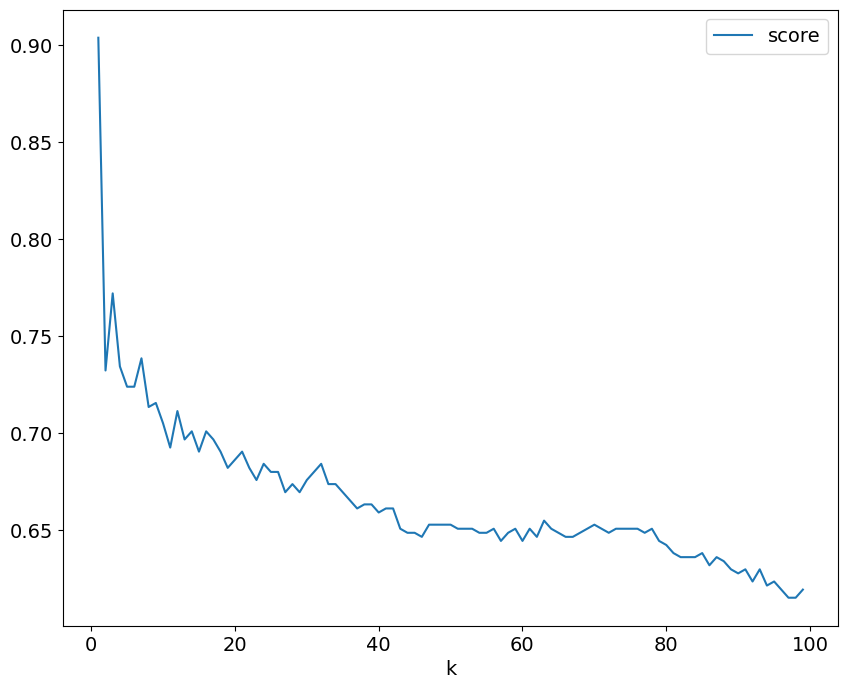

In [81]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

<font style='color:green'>**Question:** As k increases, why does the accuracy fall?</font>

<font style='color:green'>**Answer:** As k increases, the predicted label will tend towards the largest category in the training set (our baseline).</font>

#### Search for the 'best' value of K.

In [85]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [86]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [87]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.382845,0.366667
99,0.380753,0.358333
98,0.384937,0.366667
97,0.384937,0.366667
96,0.380753,0.366667


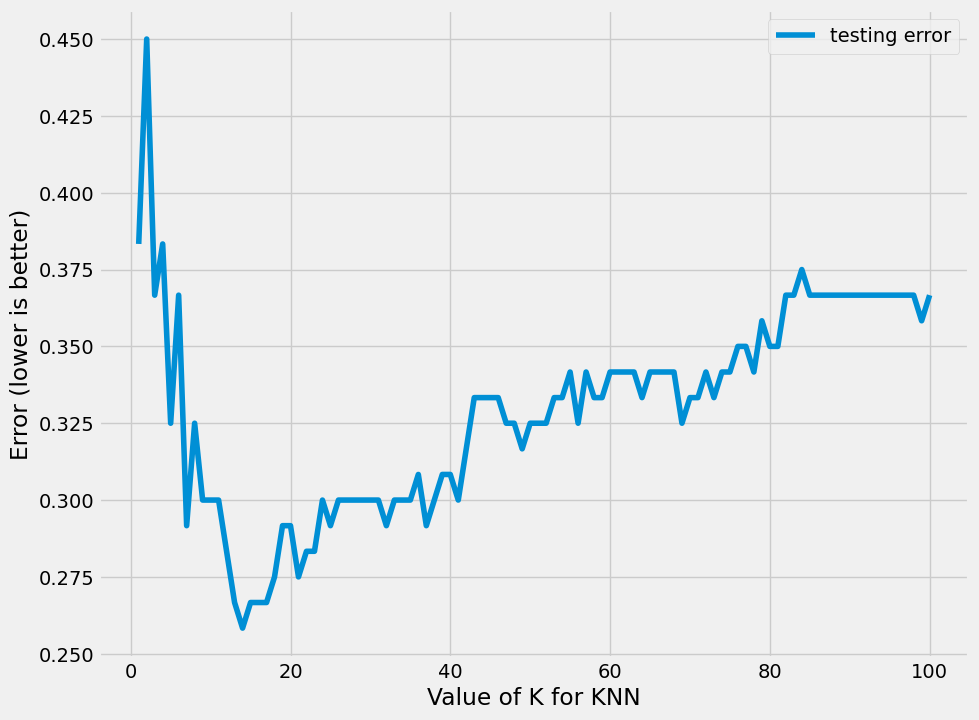

In [88]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [89]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
14,0.299163,0.258333
17,0.303347,0.266667
16,0.299163,0.266667
15,0.309623,0.266667
13,0.303347,0.266667


In [90]:
# Alternative method:
min(list(zip(testing_error, k_range)))##Error .2583 Accuracy 1-0.2583 ====.74

(0.2583333333333333, 14)

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

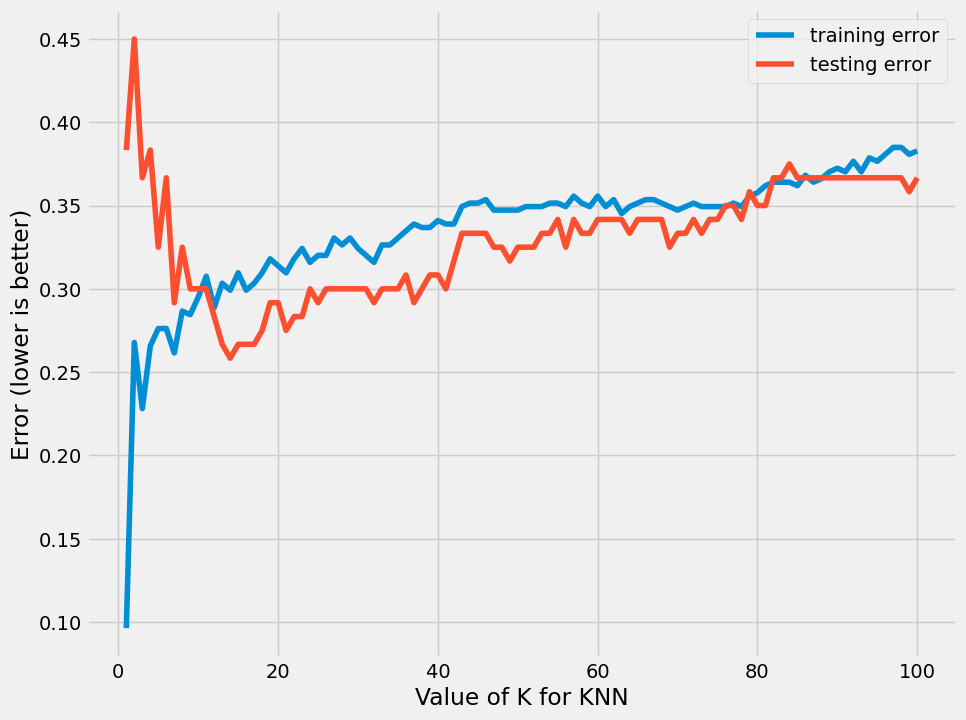

In [92]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

- **Training error** decreases as model complexity increases (the lower the value of K, the higher the complexity).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

#### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [96]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=14)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

C:\Users\natal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

What could we conclude?

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

#### [Home](#home)

<a id="standardizing-features"></a>
# <font style = 'color:blue'>f) Standardizing Features</font>
---

There is one major issue that applies to many machine learning models: they are sensitive to the scales of features (feature scale). 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortunately, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.  It can be used with Linear Regression as well as Classification.

#### Separate feature matrix and response for scikit-learn.

In [103]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Instantiate and fit `StandardScaler`.

In [107]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [109]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc, y_train)

y_pred_class = knn.predict(X_test_sc)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.29166666666666663


In [110]:
scores=[] 
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)

    y_pred_class = knn.predict(X_test_sc)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    #testing_error = 1 - testing_accuracy
    scores.append((k,testing_accuracy))
        

In [111]:
scores.sort(key=lambda x: x[1],reverse=True)
scores

[(8, 0.75),
 (28, 0.75),
 (15, 0.7416666666666667),
 (25, 0.7416666666666667),
 (26, 0.7416666666666667),
 (34, 0.7416666666666667),
 (37, 0.7416666666666667),
 (40, 0.7416666666666667),
 (35, 0.7333333333333333),
 (43, 0.7333333333333333),
 (9, 0.725),
 (12, 0.725),
 (14, 0.725),
 (21, 0.725),
 (27, 0.725),
 (29, 0.725),
 (33, 0.725),
 (39, 0.725),
 (42, 0.725),
 (44, 0.725),
 (47, 0.725),
 (3, 0.7166666666666667),
 (13, 0.7166666666666667),
 (18, 0.7166666666666667),
 (20, 0.7166666666666667),
 (30, 0.7166666666666667),
 (31, 0.7166666666666667),
 (36, 0.7166666666666667),
 (38, 0.7166666666666667),
 (41, 0.7166666666666667),
 (64, 0.7166666666666667),
 (66, 0.7166666666666667),
 (68, 0.7166666666666667),
 (70, 0.7166666666666667),
 (72, 0.7166666666666667),
 (74, 0.7166666666666667),
 (75, 0.7166666666666667),
 (7, 0.7083333333333334),
 (22, 0.7083333333333334),
 (23, 0.7083333333333334),
 (24, 0.7083333333333334),
 (32, 0.7083333333333334),
 (45, 0.7083333333333334),
 (48, 0.708333

#### [Home](#home)

<a id="comparing-knn-with-other-models"></a>
# <font style = 'color:blue'>g) Comparing KNN With Other Models</font>
---

**Advantages of KNN:**

- It's **simple to understand** and explain.
- **Model training is fast**.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- **Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.**

**Disadvantages of KNN:**

- It **must store all of the training data**.
- Its **prediction phase can be slow when n is large**.
- It is sensitive to irrelevant features.
- It is **sensitive to the scale of the data**.
- Accuracy is (generally) not competitive with the best supervised learning methods.